  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

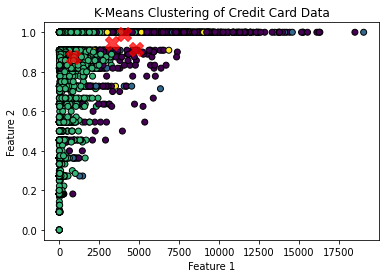

In [2]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
df = pd.read_csv('ccgen.csv')
print(df.head())
df.dropna(inplace=True)
features = df.drop(columns=['CUST_ID']).values
def kmeans(X, k, max_iters=100):
    centroids = X[nm.random.choice(X.shape[0], k, replace=False)] 
    for _ in range(max_iters):
        distances = nm.linalg.norm(X[:, nm.newaxis] - centroids, axis=2)
        labels = nm.argmin(distances, axis=1)
        new_centroids = nm.array([X[labels == i].mean(axis=0) for i in range(k)])
        if nm.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
        
    return labels, centroids
k = 4 
labels, centroids = kmeans(features, k)
df['Cluster'] = labels
print(df.head())
mtp.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
mtp.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
mtp.title('K-Means Clustering of Credit Card Data')
mtp.xlabel('Feature 1')
mtp.ylabel('Feature 2')
mtp.show()

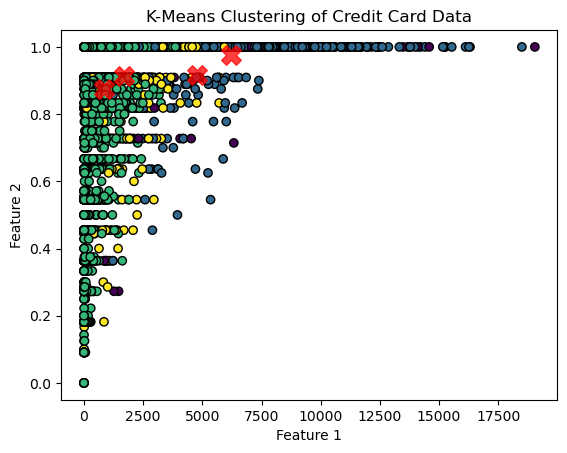

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('ccgen.csv').dropna()
features = df.drop(columns=['CUST_ID']).values

def kmeans(X, k, max_iters=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

k = 4
labels, centroids = kmeans(features, k)
df['Cluster'] = labels

plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering of Credit Card Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
